In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading in the dataset 
df = pd.read_csv('garments_worker_productivity.csv')

In [25]:
# examining the dataset features
df.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,overtime_in_hours
505,2015-01-29,Quarter5,sewing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583,January,16.0
920,2015-02-24,Quarter4,finishing,Tuesday,2,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.325000,February,16.0
252,2015-01-14,Quarter2,sewing,Wednesday,8,0.80,2.90,NaN,1440,0,0.0,0,0,8.0,0.667330,January,24.0
180,2015-01-11,Quarter2,sewing,Sunday,6,0.80,11.41,887.0,5490,50,0.0,0,0,30.5,0.800344,January,91.5
755,2015-02-14,Quarter2,finishing,Saturday,1,0.80,3.94,NaN,1440,0,0.0,0,0,12.0,0.796208,February,24.0
211,2015-01-12,Quarter2,sewing,Monday,11,0.65,12.52,1004.0,9540,44,0.0,0,0,53.0,0.649981,January,159.0
1191,2015-03-11,Quarter2,sewing,Wednesday,7,0.65,30.48,935.0,6840,26,0.0,0,1,57.0,0.650596,March,114.0
602,2015-02-04,Quarter1,finishing,Wednesday,2,0.80,3.94,NaN,2160,0,0.0,0,0,18.0,0.966759,February,36.0
1061,2015-03-04,Quarter1,sewing,Wednesday,10,0.70,21.82,1334.0,5760,30,0.0,0,0,53.0,0.700058,March,96.0
747,2015-02-12,Quarter2,sewing,Thursday,10,0.80,22.52,10.0,6000,0,0.0,0,0,50.0,0.441392,February,100.0


In [5]:
# seeing each feature datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Data Description
##### 1. date : Date in MM-DD-YYYY
##### 2. day : Day of the Week
##### 3. quarter : A portion of the month. A month was divided into four quarters
##### 4. department : Associated department with the instance
##### 5. team_no : Associated team number with the instance
##### 6. no_of_workers : Number of workers in each team
##### 7. no_of_style_change : Number of changes in the style of a particular product
##### 8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
##### 9. smv : Standard Minute Value, it is the allocated time for a task
##### 10. wip : Work in progress. Includes the number of unfinished items for products
##### 11. over_time : Represents the amount of overtime by each team in minutes
##### 12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
##### 13. idle_time : The amount of time when the production was interrupted due to several reasons
##### 14. idle_men : The number of workers who were idle due to production interruption
##### 15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


In [6]:
# size of the dataframe 
df.shape

(1197, 15)

In [7]:
# corrolation of features in the dataset
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


In [8]:
# basis stats for the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [9]:
# Questions I want to answer from EDA
# Univariate Analysis
#1. How many task are in finishing and sewing deparment
#2. What is the distribution of task across the quater
#3. What is the distrubution of the targeted productivity 
#4. What is the distribution of the actual productivity
#5. How much incentives were paid out each month
# Bivariate Analysis
#1. Work in progress by department
    #1a. Work in progress by teams
#2. Productivity of department each quarter
#3. Idle men by department. 
    #3a. Which teams had the most idle men?
#4. Overtime by department
    #4b. Which team had the most overtime
#5. Incentives paid out by department
    #5b. which team had the highest incentives
#6. When do you have the highest amount of overtime


In [10]:
# checking for sum of missing values for each feature
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [11]:
# converting the date column into a datetime object
df['date'] = pd.to_datetime(df['date'])

In [12]:
# grabbing the month name
df['month'] = df['date'].dt.month_name()

In [13]:
# converts overtime to hours 
df['overtime_in_hours'] = df['over_time'].apply(lambda x: x/60)

In [14]:
# counts total number of values in each quarter 
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [15]:
# counts the total number of values in each day
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [16]:
# counts the total number of values in each month
df['month'].value_counts()

January     542
February    443
March       212
Name: month, dtype: int64

In [19]:
# counts the total number of value for each department
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [20]:
# changes department column to only finsihing or sewing
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing' or 'finishing') else 'sewing') 

In [21]:
# no longer duplicating deaprtments
df['department'].value_counts()

sewing       948
finishing    249
Name: department, dtype: int64

# EDA

In [27]:
# creates a department df with total counts and rename columns 
department = df['department'].value_counts().reset_index()
department.rename(columns= {'index':'department','department':'total_count'},inplace=True)

In [29]:
department['total_count']

0    948
1    249
Name: total_count, dtype: int64

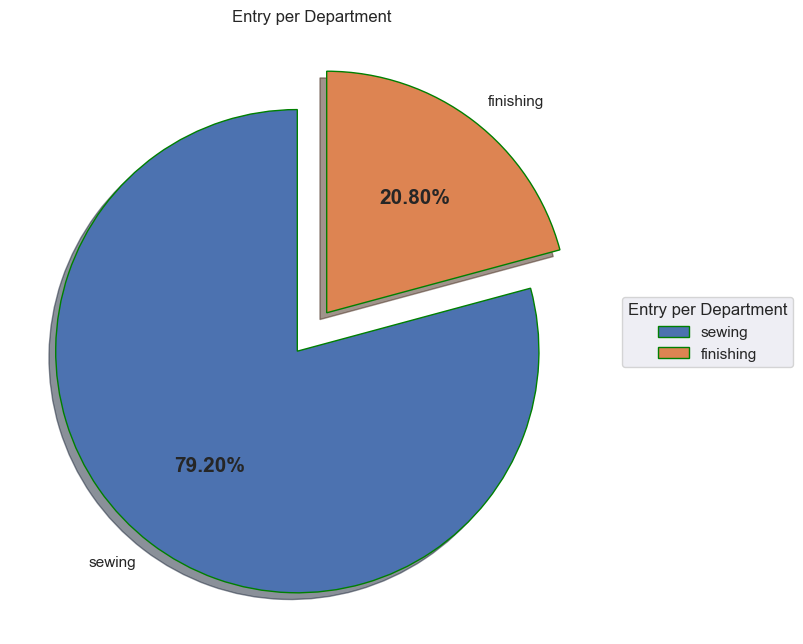

In [93]:
explode=[0.1,0.1]
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 8),dpi=100)
wedges, texts, autotexts = ax.pie(department['total_count'], 
                                  autopct = "%.2f%%",
                                  explode = explode, 
                                  labels = department['department'],
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp)
  
# Adding legend
ax.legend(wedges, department['department'],
          title ="Entry per Department",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("Entry per Department")
  
# show plot
plt.savefig("Entry_per_Department.png")
plt.show()

In [31]:
# isolating the entries per quarter
quarters = df['quarter'].value_counts().reset_index()
quarters.rename(columns={'index':'quarter','quarter':'total_count'},inplace=True)

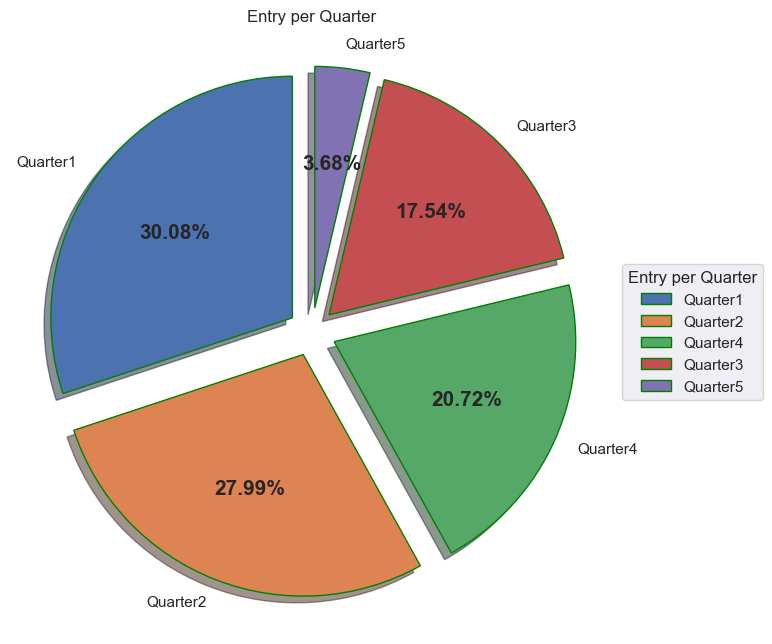

In [94]:
# plotting the number of entries per qaurter 
explode=[0.1,0.1,0.1,0.1,0.1]
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 8),dpi=100)
wedges, texts, autotexts = ax.pie(quarters['total_count'], 
                                  autopct = "%.2f%%",
                                  explode = explode, 
                                  labels = quarters['quarter'],
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp)
  
# Adding legend
ax.legend(wedges, quarters['quarter'],
          title ="Entry per Quarter",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("Entry per Quarter")
  
# show plot
plt.savefig("Entry_per_Quarter.png")
plt.show()


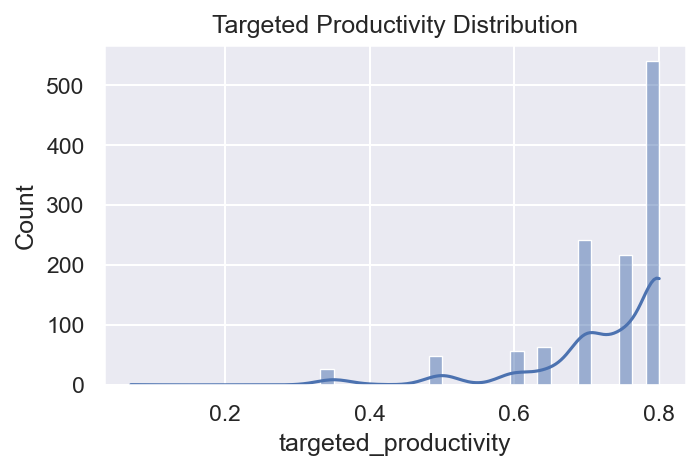

In [95]:
# plotting the distribution of targeted peoductivity 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(data=df['targeted_productivity'],kde=True)
plt.title('Targeted Productivity Distribution')
plt.savefig("Targeted_Productivity_Distribution.png")
plt.show()


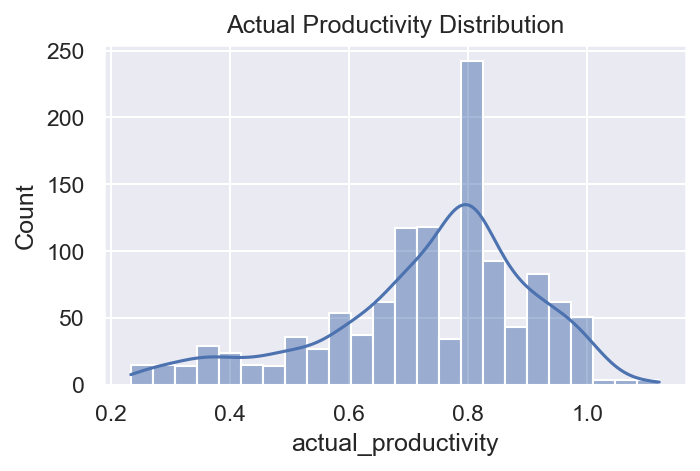

In [96]:
# plotting the distribution of actual productivity 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(data=df['actual_productivity'],kde=True)
plt.title('Actual Productivity Distribution')
plt.savefig("Actual_Productivity_Distribution.png")
plt.show()


In [97]:
#isolating the sum of incentives per month 
incentives = df[['month','incentive']].groupby('month',as_index=False,sort= False).agg({'incentive':'sum'})

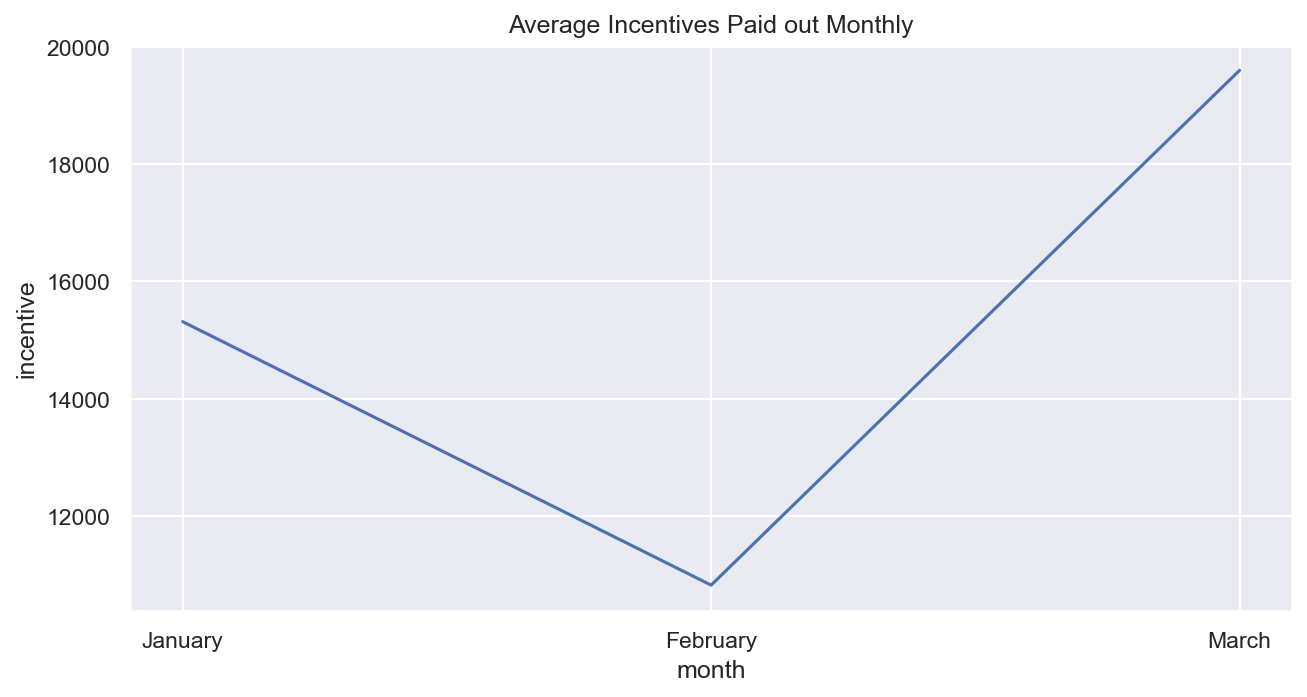

In [98]:
# plotting the average incentives per month
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.lineplot(data=incentives,x='month',y='incentive',
                 palette='Paired',sort=True,markers=True,estimator='mean')
plt.title('Average Incentives Paid out Monthly')
plt.savefig("Average_Incentives_Paid_out_Monthly.png")
plt.show()


In [55]:
# average work in progress per team
work_in_progress_per_team = df[['month','wip','team']].groupby('team',as_index=False).mean()

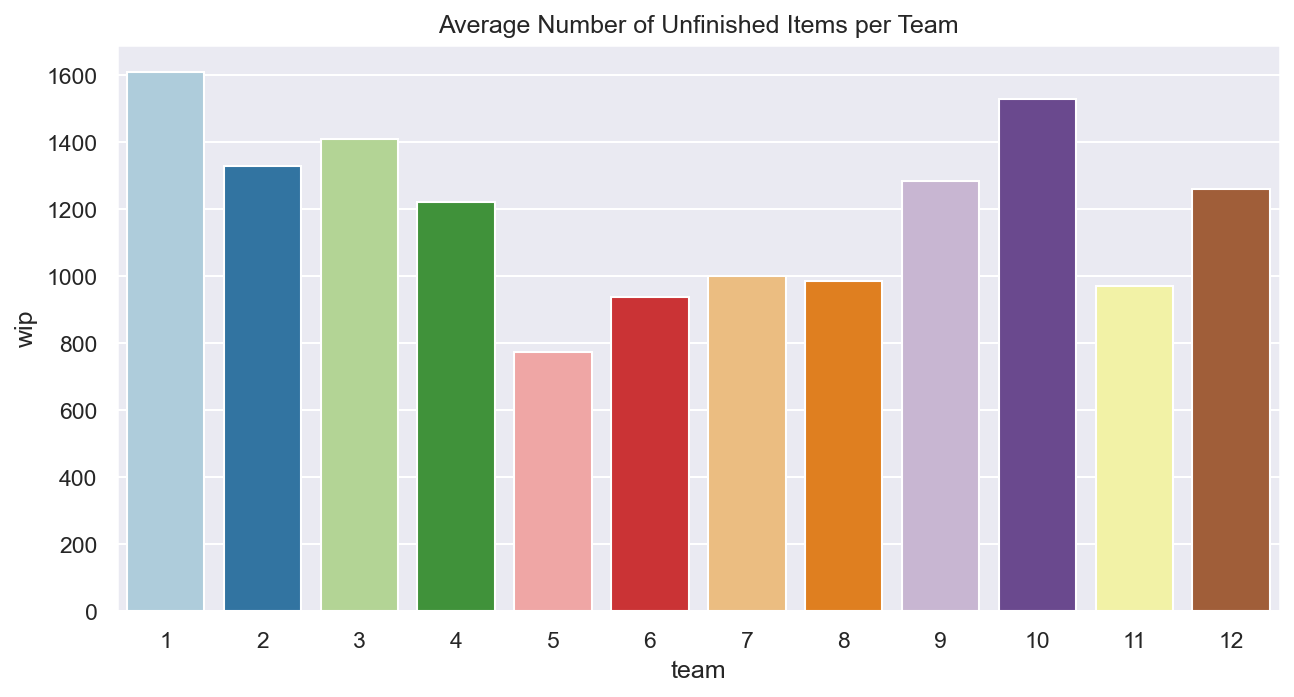

In [99]:
# plotting the average number of unfinished items per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.barplot(data=work_in_progress_per_team,x='team',y='wip',
                 palette='Paired')
plt.title('Average Number of Unfinished Items per Team')
plt.savefig("Average_Number_of_Unfinished_Items_per_Team.png")
plt.show()


In [59]:
# average working in progress per month
work_in_progress_per_month =  df[['month','wip']].groupby('month',sort=False).mean()

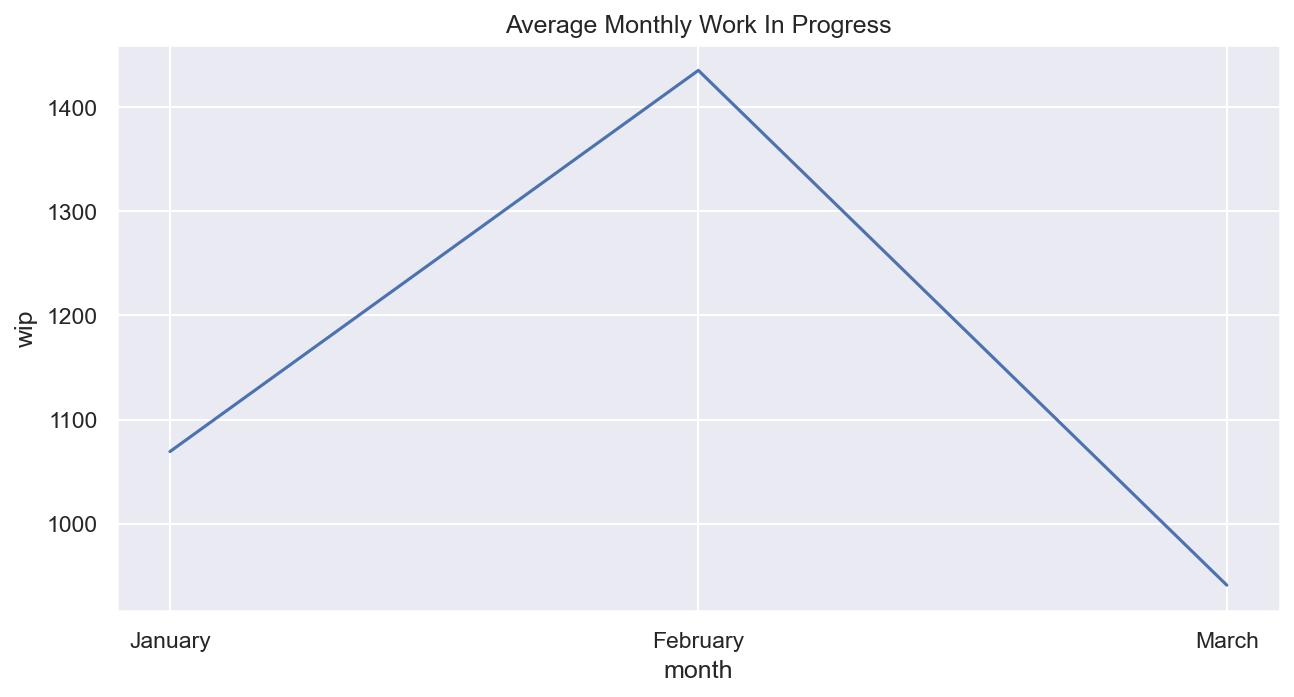

In [100]:
# plotting the average number of unfinished items per month
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.lineplot(data=work_in_progress_per_month,x='month',y='wip',
                 palette='Paired',sort=False)
plt.title('Average Monthly Work In Progress')
plt.savefig('Average_Monthly_Work_In_Progress.png')
plt.show()


In [63]:
# average idle men per team
idle_men_per_team = df[['team','idle_men']].groupby('team',as_index=False).agg({'idle_men':'sum'})

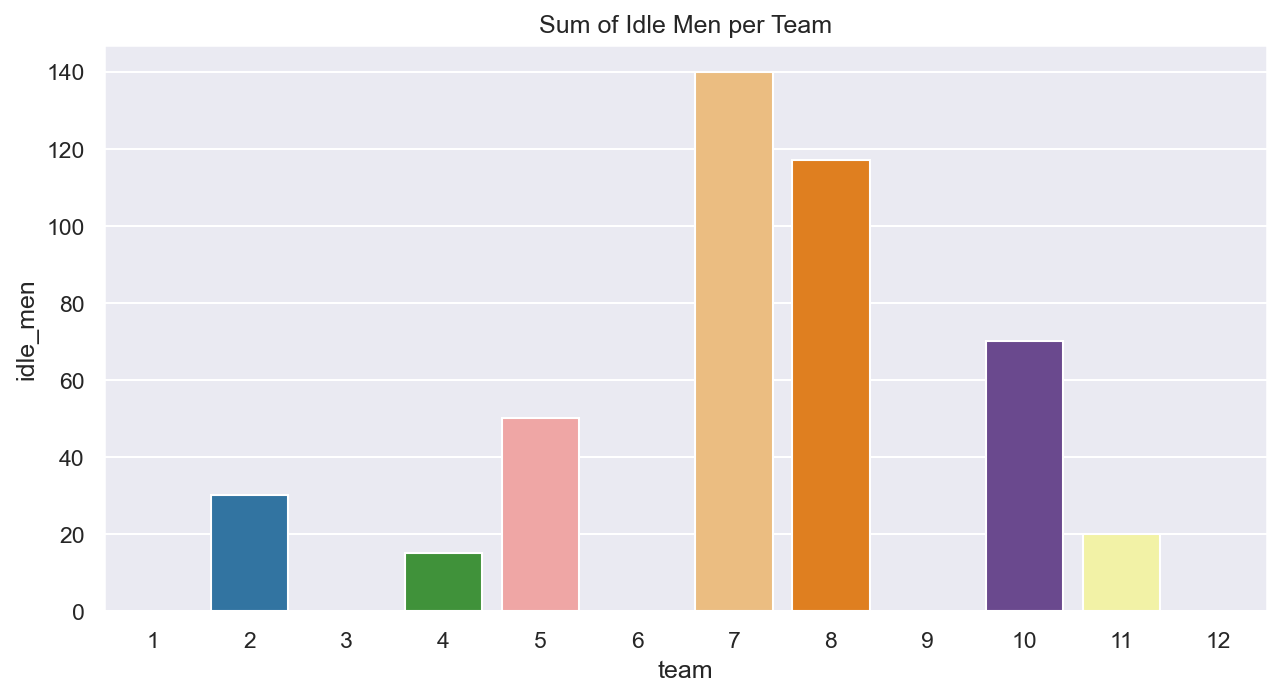

In [101]:
# plotting average idle men per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.barplot(data=idle_men_per_team,x='team',y='idle_men',
                 palette='Paired')
plt.title('Sum of Idle Men per Team')
plt.savefig('Sum_of_Idle_Men_per_Team.png')
plt.show()


In [66]:
# average overtime in hours per team
    
over_time_per_team = df[['team','overtime_in_hours']].groupby('team',
                                            as_index=False).agg({'overtime_in_hours':'mean'})

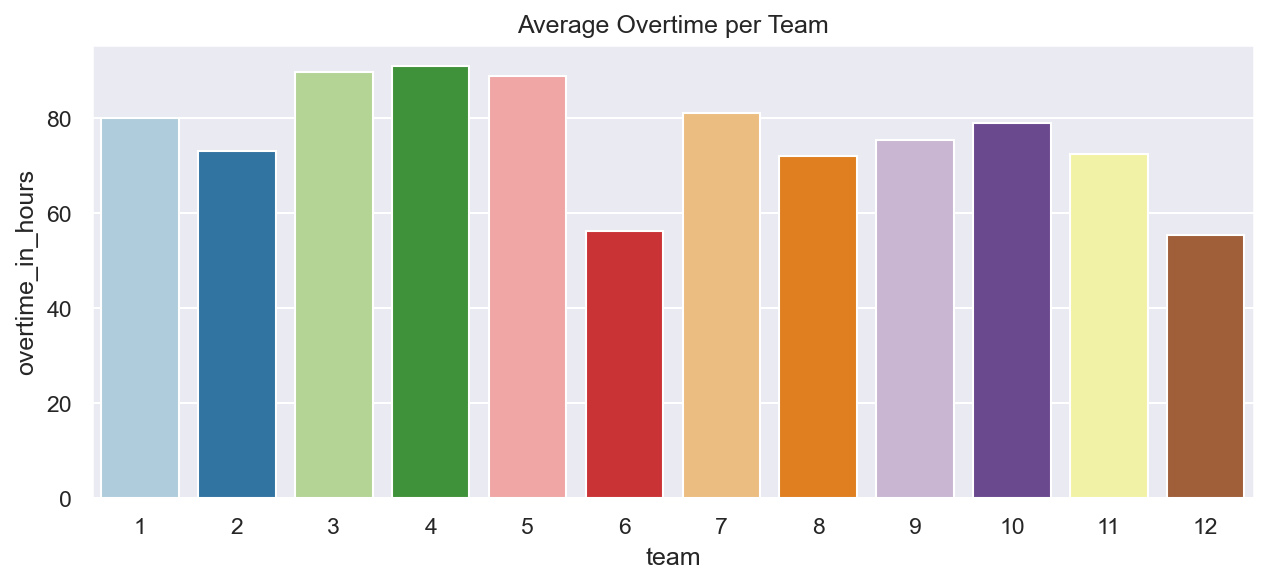

In [102]:
# plotting the average overtime per team 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.barplot(data=over_time_per_team,x='team',y='overtime_in_hours',
                 palette='Paired')
plt.title('Average Overtime per Team')
plt.savefig('Average_Overtime_per_Team.png')
plt.show()


In [68]:
# sum of incentives per team
incentives_per_team = df[['team','incentive']].groupby('team',
                                                as_index=False).agg({'incentive':'sum'})

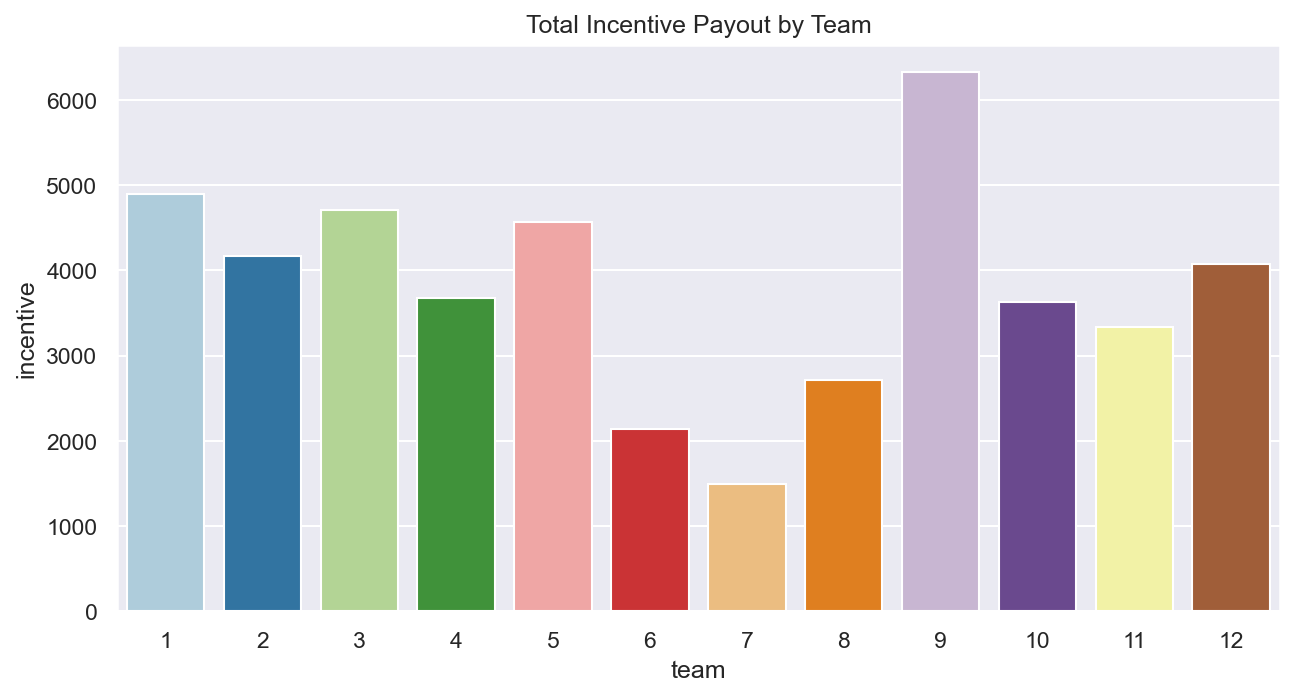

In [103]:
# plotting total incentives per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.barplot(data=incentives_per_team,x='team',y='incentive',
                 palette='Paired')
plt.title('Total Incentive Payout by Team')
plt.savefig('Total_Incentive_Payout_by_Team.png')
plt.show()


In [71]:
# average monthly overtime trend 
overtime_per_month = df[['month','overtime_in_hours']].groupby('month',
                                                sort=False).agg({'overtime_in_hours':'mean'})

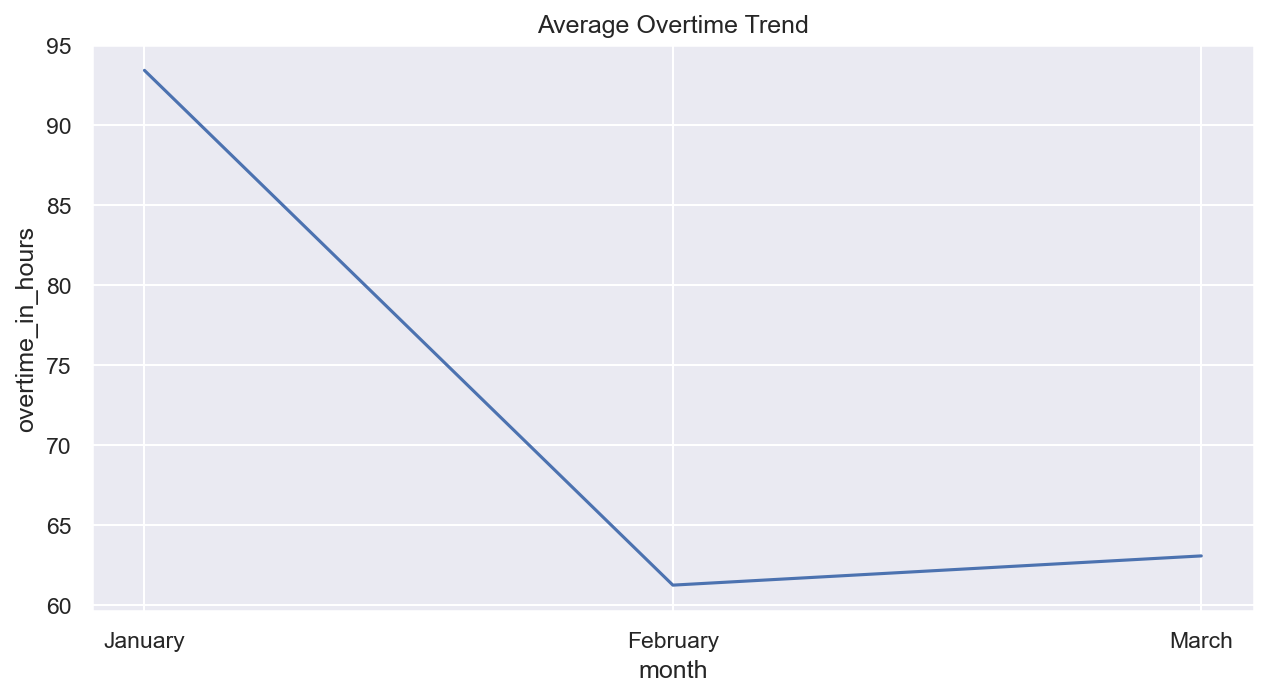

In [104]:
# plotting the average monthly overtime trend
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.lineplot(data=overtime_per_month,x='month',y='overtime_in_hours',
                 palette='Paired',sort=False)
plt.title('Average Overtime Trend')
plt.savefig('Average_Overtime_Trend.png')
plt.show()


In [90]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,overtime_in_hours
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,January,118.0
1,2015-01-01,Quarter1,sewing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,January,16.0
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January,61.0
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January,61.0
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,January,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,March,16.0
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,March,16.0
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,March,16.0
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,March,30.0


# Modling

In [91]:
# transform your dataset into supervised Learning format

In [92]:
# Write function that takes in model and outputs Error with plotting information